# Battles in Root
In the boardgame [Root](https://en.wikipedia.org/wiki/Root_(board_game), battles are fought by rolling two 12-sided dice, both showing the numbers 0 to 3 three times each. The dice score determines the hits a faction gets and thus the losses the other faction suffers. The attacker and the Woodland Alliance always get the higher die score.

This notebook calculates the probability distribution of losses for both factions in a battle.
- possible die scores:

In [1]:
die = [n for n in range(4)]
print(die)

[0, 1, 2, 3]


- all possible roll combinations:

In [2]:
combinations = [[die1,die2] for die1 in die for die2 in die]
print(combinations)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]


- losses (attacker gets the higher die score):

In [3]:
combination_sorted = [sorted(combination) for combination in combinations]
attacker_losses = [combination[0] for combination in combination_sorted]
defender_losses = [combination[1] for combination in combination_sorted]
print(f'attacker: {attacker_losses}')
print(f'defender: {defender_losses}')

attacker: [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 3]
defender: [0, 1, 2, 3, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3]


- expected values:

In [4]:
import numpy as np
print(f'attacker: {np.mean(attacker_losses)}')
print(f'defender: {np.mean(defender_losses)}')

attacker: 0.875
defender: 2.125


- probability distribution:

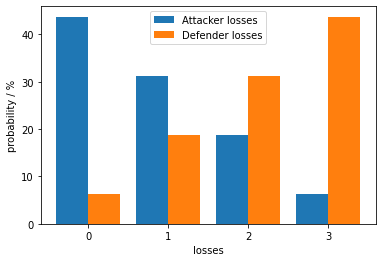

In [5]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

N_attacker = np.histogram(attacker_losses, bins = np.arange(min(attacker_losses), min(attacker_losses) + len(set(attacker_losses)) + 1), density=True)
N_defender = np.histogram(defender_losses, bins = np.arange(min(defender_losses), min(defender_losses) + len(set(defender_losses)) + 1), density=True)

ax = plt.figure().gca()
plt.bar(N_attacker[1][:-1] - 0.2, N_attacker[0]*100, width=0.4, label='Attacker losses')
plt.bar(N_defender[1][:-1] + 0.2, N_defender[0]*100, width=0.4, label='Defender losses')
plt.legend()
plt.xlabel('losses')
plt.ylabel('probability / %')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))   # integer ticks